In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [1]:
p_y = pd.read_excel('cpt.xlsx')

In [ ]:
p_y.iloc[:,0:1]

In [ ]:
def plot(df, x = 'Pile head displacement (m)', y = 'Force (kN)'):
    plt.figure(figsize=(4, 8))
    plt.xlabel(x) 
    plt.ylabel(y) 
#     plt.gca().invert_yaxis()
    plt.plot(df.iloc[:,0:1],df.iloc[:,1:2])
    plt.savefig('force_dis.png', dpi=300)
    return 

In [ ]:
plot(p_y)

# barchart

In [ ]:
H0 = pd.DataFrame({'Ground truth (kN)':[11618], 'Hybrid neural network result (kN)':[11955], 'p-y analysis result (kN)': [18404]})

In [ ]:
plt.figure(figsize=(4,8))
H0.unstack().plot.bar()
plt.savefig('barplot.png', dpi = 300)

In [ ]:
cpt = pd.read_csv('test.csv')

In [ ]:
cpt.drop(index=[0,1,2,3,4], inplace = True)
cpt.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
cpt.head()

In [ ]:
cpt.reset_index().drop(columns = ['index'], inplace = True)
cpt.rename({'0':'Depth', '1':'qc'}, axis = 1, inplace = True)

In [ ]:
noise = np.random.normal(loc = 0, scale = .5, size = 229)

In [ ]:
cpt['noise']=cpt['qc']+noise

In [ ]:
def plot_cpt (df, x = 'qc', y = 'depth'):
    plt.figure(figsize=(4, 8))
    plt.xlabel(x) 
    plt.ylabel(y) 
    plt.gca().invert_yaxis()
    plt.plot(df[x],df[y])
    plt.savefig('cpt_noisy.png', dpi=300)
    return 

In [ ]:
plot_cpt(cpt,'noise','Depth')

# Load response curve

In [2]:
theta = np.arange(0,1,0.0001)

In [3]:
def coef(H05, H1):
    etha = 2/H1 - 1/H05
    k = 1/H05 - 1/H1
    return etha, k

In [4]:
def H(etha, k, theta):
    return theta/(k+ etha*theta)

In [5]:
theta = np.arange(0,1.4,0.001)

## FEM

In [6]:
fem_etha, fem_k = coef(7674.55, 13114.52)

In [7]:
fem_H = H(fem_etha, fem_k, theta)

## DL

In [8]:
dl_etha, dl_k = coef(7858.74, 13442.38)

In [9]:
dl_H = H(dl_etha, dl_k, theta)

## p-y

In [10]:
py_etha, py_k = coef(13499.17, 23053.37)

In [11]:
py_H = H(py_etha, py_k, theta)

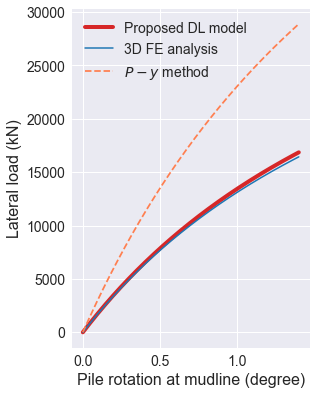

In [19]:
plt.figure(figsize=(4.5,5.6))

plt.plot(theta, dl_H,color = 'tab:red', lw = 4, label = 'Proposed DL model')
plt.plot(theta, fem_H, color = 'tab:blue', lw = 1.5, label = '3D FE analysis')
plt.plot(theta, py_H, '--', color = 'coral', label = r'${P-y}$ method')

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('font', **{'family' : 'Arial','weight' : 'normal'})

plt.xlabel('Pile rotation at mudline (degree)', fontname="Arial", fontsize=16)
plt.ylabel('Lateral load (kN)', fontname="Arial", fontsize=16)


plt.legend(prop={'size': 14},loc="upper left")

plt.tight_layout()
plt.savefig('LoadResponse.png', dpi = 300)